#### Understanding the Data with Problem Statement

Given is the data of a lending club with the historical information of the borrowers with their attributes. Based on various factors, the company had accepted the loan. But their **loan_status** has been marked as **Fully Paid**, **Current** or **Charged-off**.

   **Fully paid** : Applicant has fully paid the loan (the principal and the interest rate)

   **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

   **Charged-off** : Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan 
   
   

#### Requirement 

After analyzing the shared historical loan data, we need to figure out the attributes that may be used to indentify the risky loan applicants. And thus reducing the credit loss to the company.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [80]:
# importing the python libraries required for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#Reading the loan data in pandas data frame for EDA 
ld = pd.read_csv("loan.csv")
ld

/var/folders/bm/c1v9cszd4knc4308_vn263j80000gq/T/ipykernel_83285/3641402106.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  ld = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ld

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data understanding and simplification


Because, we need to deduce the inferences based on the loan_status, the **Current** status - the applicants still paying the instalments can't be used to retrieve the pattern. 
Hence, we should only consider the **Fully Paid** and **Charged-Off**.
So, we can clearly filter out these two loan_status. 

Now, We need to find the relationship of various variables against **loan_status**  when loan_status is **Fully Paid** or **Charged-Off**



In [27]:
ld = ld[ld['loan_status'].isin(['Charged Off','Fully Paid'])]
ld

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




### Cleaning the Data

We see that there are a lot of columns where most of the values are null. And hence they are not the candidates to be used for analysis. We can filter them out. 
For the ease, let us only consider the fields with null value lesser than **50%**. And let us filter the remaining data.

In [28]:
#Filtering the columns which have null value less than 50% . 
# Because more null values won't help us in analysis.


# 1. To see the missing values distribution
percent_missing = ld.isnull().sum() * 100 / len(ld)
missing_value_df = pd.DataFrame({'column_name': ld.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
id,id,0.000000
member_id,member_id,0.000000
loan_amnt,loan_amnt,0.000000
funded_amnt,funded_amnt,0.000000
funded_amnt_inv,funded_amnt_inv,0.000000
...,...,...
tax_liens,tax_liens,0.101097
tot_hi_cred_lim,tot_hi_cred_lim,100.000000
total_bal_ex_mort,total_bal_ex_mort,100.000000
total_bc_limit,total_bc_limit,100.000000


In [29]:
#Filtering the columns which have null value less than 50% . 
valid_colums = missing_value_df[missing_value_df['percent_missing']<50]
valid_colums

#Filtering the loan data with only valid_columns
ld = ld[valid_colums['column_name']]
ld

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## Data Analysis

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for **approval/rejection** of the loan. 

There are broadly three types of variables –
 1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 

 2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 

 3. Customer behavior variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).


 **Now, we know that the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.** 


Upon carefully going through the data, we figured out that **following are the customer behaviour variables**. And these can safely be ignored as they are not available at the time of loan application. 




<font color='red'>
delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc,pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type </font>

 
 
Whereas, variables such as <font color='green'> acc_now_delinquent, chargeoff within 12 months </font> etc. (which are related to the applicant's past loans) are available from the credit bureau.

In [30]:
cust_behaviour = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]
ld = ld.drop(cust_behaviour, axis=1)
ld

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,AZ,11.20,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [31]:
ld

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,AZ,11.20,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


### Understanding -  loan_amnt, funded_amnt, funded_amnt_inv 

We see the three important fields related to loan amount - 
 **loan_amnt, funded_amnt, funded_amnt_inv**

**loan_amnt** is the amount applied by potential borrowers,
**funded_amnt** is the amount recommended/approved by Lending Club, and **funded_amnt_inv** is the amount funded by investors. 

 **We observe that there is a difference between the amount funded by investors and the amount approved by Lending club. And in multiple cases, the investors have allotted a lesser fund to few borrowers.**
    
<font color='red'> This difference can be used to derive some inclination towards an application who may have some bad reputation.
    <font/>
    
Let us create a new column with name **fund_less_than_approved** to show the difference i.e. **funded_amnt_inv - funded_amnt**
    

In [32]:
ld['fund_less_than_approved'] = ld['funded_amnt_inv']-ld['funded_amnt']

In [33]:
ld.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fund_less_than_approved
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,27.65,f,0.0,1,0,0.0,0,0.0,0.0,-25.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.00,f,0.0,1,0,0.0,0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,8.72,f,0.0,1,0,0.0,0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,11.20,f,0.0,1,0,0.0,0,0.0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,23.51,f,0.0,1,0,0.0,0,0.0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,5.35,f,0.0,1,0,0.0,0,0.0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,5.55,f,0.0,1,0,0.0,0,0.0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,18.08,f,0.0,1,0,0.0,0,0.0,0.0,-25.0
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,16.12,f,0.0,1,0,0.0,0,0.0,0.0,0.0


In [34]:
ld.to_csv('simple_ld.csv')

In [35]:
ld[ld['loan_status']=='Charged Off']['fund_less_than_approved'].value_counts()

 0.00000        2760
-25.00000        643
-50.00000        242
-250.00000       124
-75.00000        107
                ... 
-406.23424         1
-613.09529         1
-229.35706         1
-449.97939         1
-17200.00000       1
Name: fund_less_than_approved, Length: 1339, dtype: int64

In [36]:
ld['int_rate_num'] = ld.int_rate.str.strip('%').astype(float)
ld

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fund_less_than_approved,int_rate_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,f,0.0,1,0,0.0,0,0.0,0.0,-25.0,10.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,f,0.0,1,0,0.0,0,0.0,0.0,0.0,15.27
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,f,0.0,1,0,0.0,0,0.0,0.0,0.0,15.96
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,f,0.0,1,0,0.0,0,0.0,0.0,0.0,13.49
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,f,0.0,1,0,0.0,0,0.0,0.0,0.0,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,-1425.0,8.07
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,f,NaN,1,0,NaN,0,NaN,NaN,-7625.0,10.28
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,f,NaN,1,0,NaN,0,NaN,NaN,-3675.0,8.07
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,f,NaN,1,0,NaN,0,NaN,NaN,-4350.0,7.43


In [37]:
ld[ld['loan_status']=='Fully Paid']['fund_less_than_approved'].value_counts()

 0.000000       16587
-25.000000       3091
-50.000000       1419
-250.000000      1083
-100.000000       639
                ...  
-112.762120         1
-4.667997           1
-389.245860         1
-493.036950         1
-3675.000000        1
Name: fund_less_than_approved, Length: 6132, dtype: int64

In [38]:
### Binning the interest rate in Slab 
ld.loc[ld['int_rate_num'].between(3, 6, 'right'), 'int_rate_slab'] = '3=6'
ld.loc[ld['int_rate_num'].between(6,9 , 'right'), 'int_rate_slab'] = '6=9'
ld.loc[ld['int_rate_num'].between(9,12 , 'right'), 'int_rate_slab'] = '9=12'
ld.loc[ld['int_rate_num'].between(12,15 , 'right'), 'int_rate_slab'] = '12=15'
ld.loc[ld['int_rate_num'].between(15,18 , 'right'), 'int_rate_slab'] = '15=18'
ld.loc[ld['int_rate_num'].between(18,21 , 'right'), 'int_rate_slab'] = '18=21'
ld.loc[ld['int_rate_num'].between(21,24 , 'right'), 'int_rate_slab'] = '21=24'
ld.loc[ld['int_rate_num'].between(24,27 , 'right'), 'int_rate_slab'] = '24=27'
ld.loc[ld['int_rate_num'].between(27,30 , 'right'), 'int_rate_slab'] = '27=30'
ld.loc[ld['int_rate_num'].between(30,33 , 'right'), 'int_rate_slab'] = '30=33'
ld.loc[ld['int_rate_num'].between(33,100 , 'right'), 'int_rate_slab'] = '33+'

In [39]:
### Binning the dti in Slab 
ld.loc[ld['dti'].between(0, 5, 'right'), 'dti_slab'] = '0=5'
ld.loc[ld['dti'].between(5,10 , 'right'), 'dti_slab'] = '5=10'
ld.loc[ld['dti'].between(10,15 , 'right'), 'dti_slab'] = '10=15'
ld.loc[ld['dti'].between(15,20 , 'right'), 'dti_slab'] = '15=20'
ld.loc[ld['dti'].between(20,25 , 'right'), 'dti_slab'] = '20=25'
ld.loc[ld['dti'].between(25,30 , 'right'), 'dti_slab'] = '25=30'
ld.loc[ld['dti'].between(30,35 , 'right'), 'dti_slab'] = '30=35'
ld.loc[ld['dti'].between(35,100 , 'right'), 'dti_slab'] = '35+'

In [40]:
### Binning the Annual Inc in Slab 
ld.loc[ld['annual_inc'].between(0, 25000, 'right'), 'annual_inc_slab'] = '0-25k'
ld.loc[ld['annual_inc'].between(25000,50000 , 'right'), 'annual_inc_slab'] = '25-50k'
ld.loc[ld['annual_inc'].between(50000,75000 , 'right'), 'annual_inc_slab'] = '50-75k'
ld.loc[ld['annual_inc'].between(75000,100000 , 'right'), 'annual_inc_slab'] = '75-100k'
ld.loc[ld['annual_inc'].between(100000,125000 , 'right'), 'annual_inc_slab'] = '100-125k'
ld.loc[ld['annual_inc'].between(125000,150000 , 'right'), 'annual_inc_slab'] = '125-150k'
ld.loc[ld['annual_inc'].between(150000,175000 , 'right'), 'annual_inc_slab'] = '150-175k'
ld.loc[ld['annual_inc'].between(175000,200000 , 'right'), 'annual_inc_slab'] = '175-200k'
ld.loc[ld['annual_inc'].between(200000,500000 , 'right'), 'annual_inc_slab'] = '200k+'


In [41]:
ld.shape

(38577, 38)

In [42]:
ld.to_csv('simple_ld.csv')

In [71]:
fp = ld[ld['loan_status']=='Fully Paid']
fp.to_csv('fp.csv')

In [72]:
co = ld[ld['loan_status']=='Charged Off']
co.to_csv('co.csv')

In [73]:
fp

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,delinq_amnt,pub_rec_bankruptcies,tax_liens,fund_less_than_approved,int_rate_num,int_rate_slab,dti_slab,annual_inc_slab,loan_status_ind,term_in_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0,0.0,0.0,-25.0,10.65,9=12,25=30,0-25k,1,36
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0,0.0,0.0,0.0,15.96,15=18,5=10,0-25k,1,36
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0,0.0,0.0,0.0,13.49,12=15,15=20,25-50k,1,36
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0,0.0,0.0,0.0,7.90,6=9,10=15,25-50k,1,36
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0,0.0,0.0,0.0,15.96,15=18,20=25,25-50k,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0,NaN,NaN,-1425.0,8.07,6=9,10=15,100-125k,1,36
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0,NaN,NaN,-7625.0,10.28,9=12,5=10,0-25k,1,36
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0,NaN,NaN,-3675.0,8.07,6=9,0=5,75-100k,1,36
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0,NaN,NaN,-4350.0,7.43,6=9,0=5,175-200k,1,36


In [46]:
#Setting loan_status_id as 0 for Charged Off and 1 for Fully Paid, for the ease of analysis 
ld['loan_status_ind'] = '0'
ld.loc[ld['loan_status']!= 'Charged Off', 'loan_status_ind'] = '1'

In [69]:
ld['term_in_month'] = ld.term.str.strip(' months').astype(int)

In [48]:
fp.shape

(32950, 38)

## What each column represents

1. loan_status : status of the loan i.e. 'Fully Paid' or 'Charged Off'
2. loan_status_ind : status of the loan in boolean i.e. 1 for 'Fully Paid' or 0 for 'Charged Off'
3. int_rate_num : interest rate at which the loan is granted. Removed trailing % from int_rate column and created this new column.
4. annual_inc : Annual income of the applicant 
5. loan_amnt : the loan amount the is applied for approval.
6. purpose : Purpose for which the loan is applied. e.g. small business, debt consolidation, credit card etc.
7. home_ownership : Defines the status of home ownership of applicant e.g. RENT, OWN, MORTGAGE etc.
8. grade : this is the grading assigned to the loan based on various parameters. 
9. sub-grade  : sub group of grade attribute which is used categorize the quality of loan.
10. debt-to-income : This is a ratio of the debt an applicant posseses to the income of the applicant. 
11. term_in_month : The column derived by trimming 'months' from term column. Defines the term for which the loan is taken. e.g. 36 months, 60 months.
12. funded_amnt : funded_amnt is the amount recommended/approved by Lending Club
13. funded_amnt_inv : It is the amount funded by investors.  
14. fund_less_than_approved : Newly introduced. This is the difference between the amount approved by Lending Club and the amount funded by investors.This can hold significant meaning to analyse the impact on the credit risk.

## Impact of Interest Rate on loan_status 

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


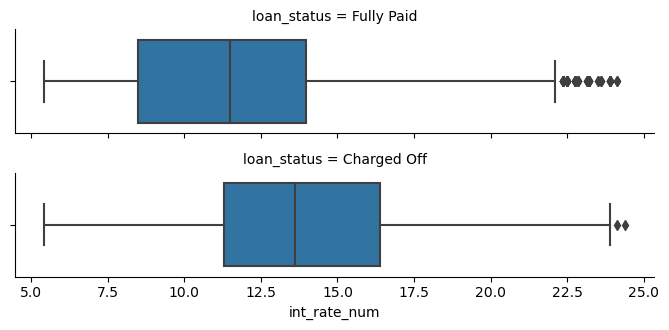

In [51]:
#Plotting the relation of loan_status and Interest Rate 

loan_status_kind = ld.loan_status.value_counts().index
sea = sns.FacetGrid(ld, row = "loan_status",
                    row_order = loan_status_kind,
                    height = 1.7, aspect = 4)
 
sea.map(sns.boxplot, "int_rate_num")
plt.show()

#### Observation on interest rate vs loan_status
>> We observe that the applicants whose loan status is Charged Off i.e. Defaulters have slightly higher interest rate in the distribution. We can infer that the lower the interest rate, the easier it is to pay.

## Impact of Annual Income on loan_status 

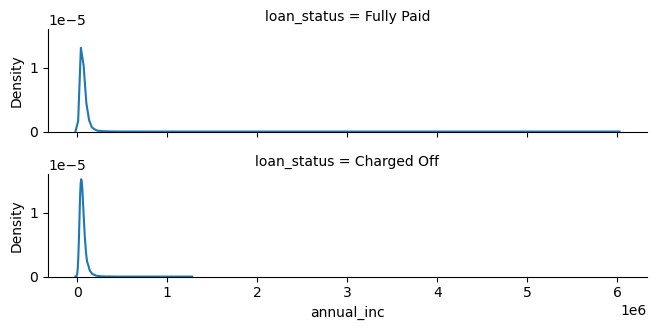

In [53]:
#Plotting the relation of loan_status and Annual Income

loan_status_kind = ld.loan_status.value_counts().index
sea = sns.FacetGrid(ld, row = "loan_status",
                    row_order = loan_status_kind,
                    height = 1.7, aspect = 4)
 
sea.map(sns.kdeplot, "annual_inc")
plt.show()

#### Observation on impact of annual_income on loan_status 
>> We observe that annual income of the applicants doesnt have any visible impact on the loan_status. Hence it hasn't been a major decisive factor, from the historical evidences.




## Impact of loan_amnt on loan_status 

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


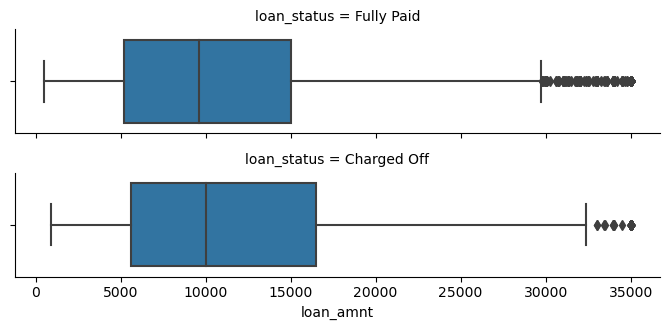

In [54]:
loan_status_kind = ld.loan_status.value_counts().index
sea = sns.FacetGrid(ld, row = "loan_status",
                    row_order = loan_status_kind,
                    height = 1.7, aspect = 4)
 
sea.map(sns.boxplot, "loan_amnt")
plt.show()


#### Observation on impact of loan_amnt on loan_status 
>> We observe that loan_amnt of the applications has a minor difference on the loan_status. Hence it can be considered as a minor decisive factor, from the historical evidences.

## Impact of purpose on loan_status 

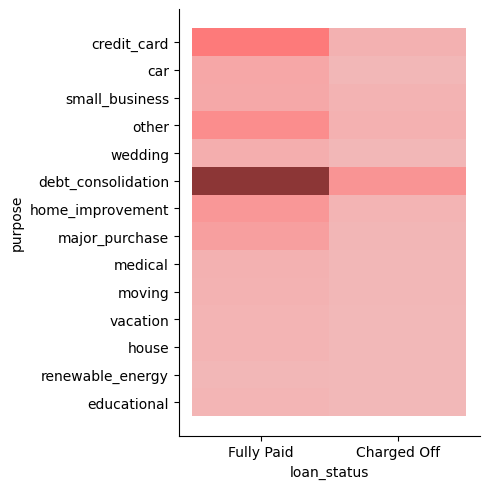

In [56]:
#Plotting the relation of loan purpose on loan_status 

sns.displot(y='purpose', x ='loan_status', data=ld, color='red')
plt.show()

#### Observation on loan purpose and loan status
>> We don't see any significant impact of the loan purpose in deciding the loan_status. 

## Impact of home_ownership on loan_status 

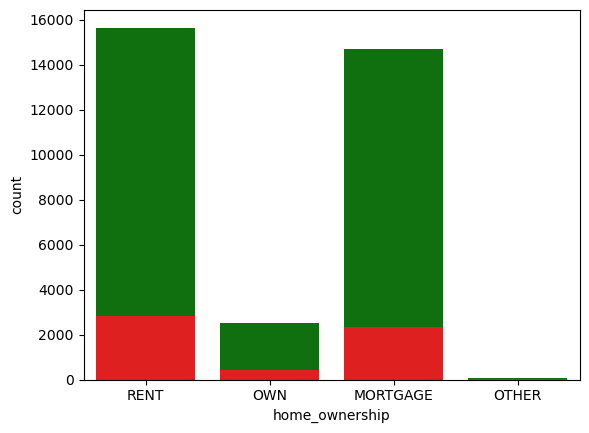

In [58]:
#Plotting the graph to see home ownership distributions in both loan status 
# Green is Fully Paid
#Red - Charged Off 
sns.countplot(x='home_ownership', data=fp, color='green')
sns.countplot(x='home_ownership', data=co, color='red')
plt.show()

#### Observation on home ownership and loan status
>> We see that home ownership is kind of proportionate in both the loan statuses. Hence, it doesn't make much impact on the ultimate loan status.

## Impact of loan gradings on loan_status 

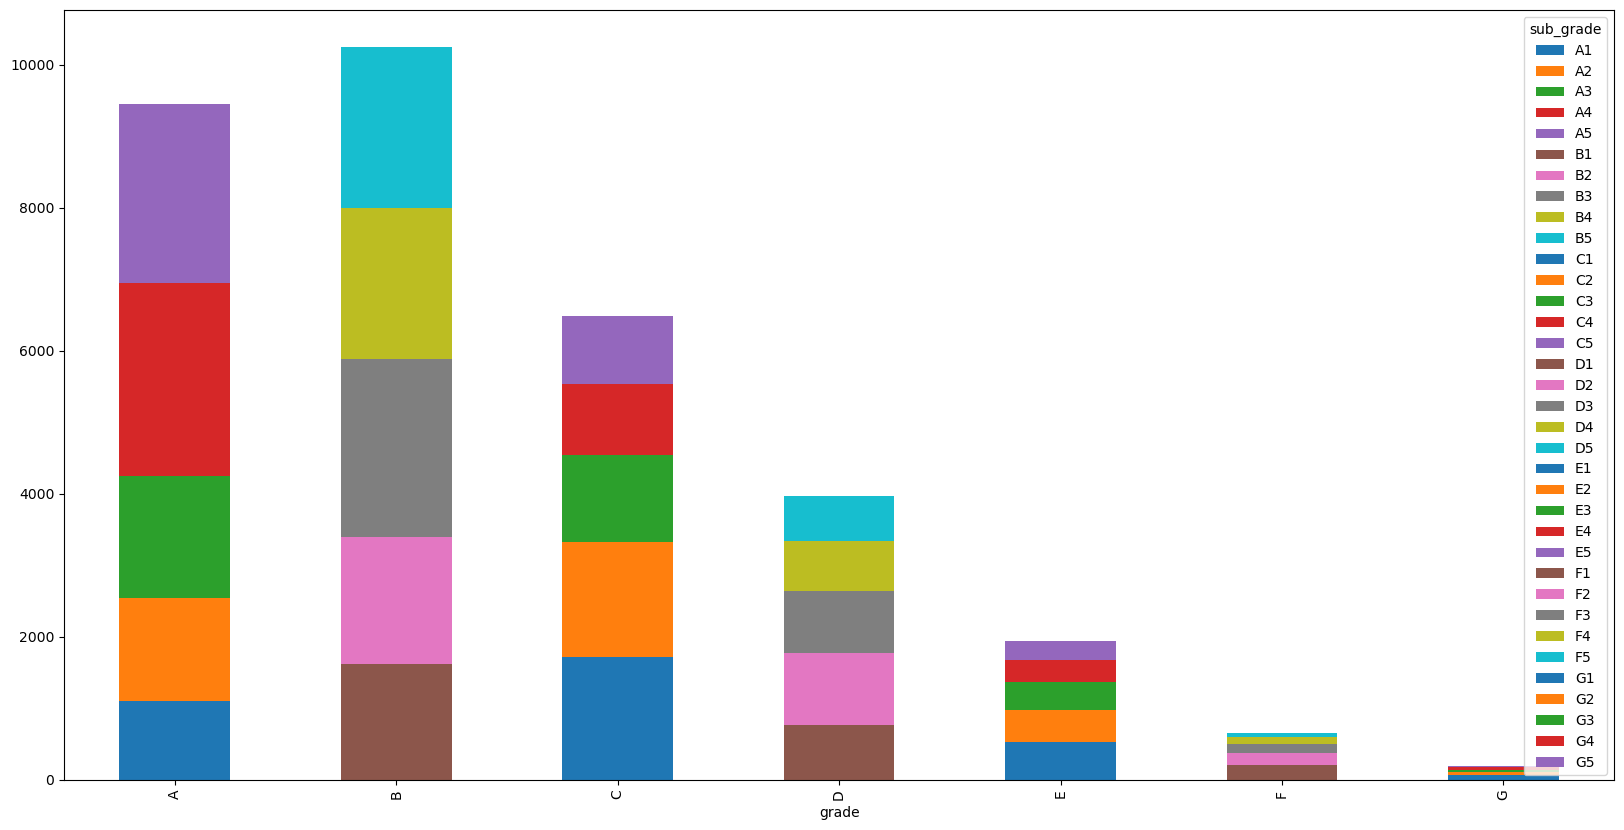

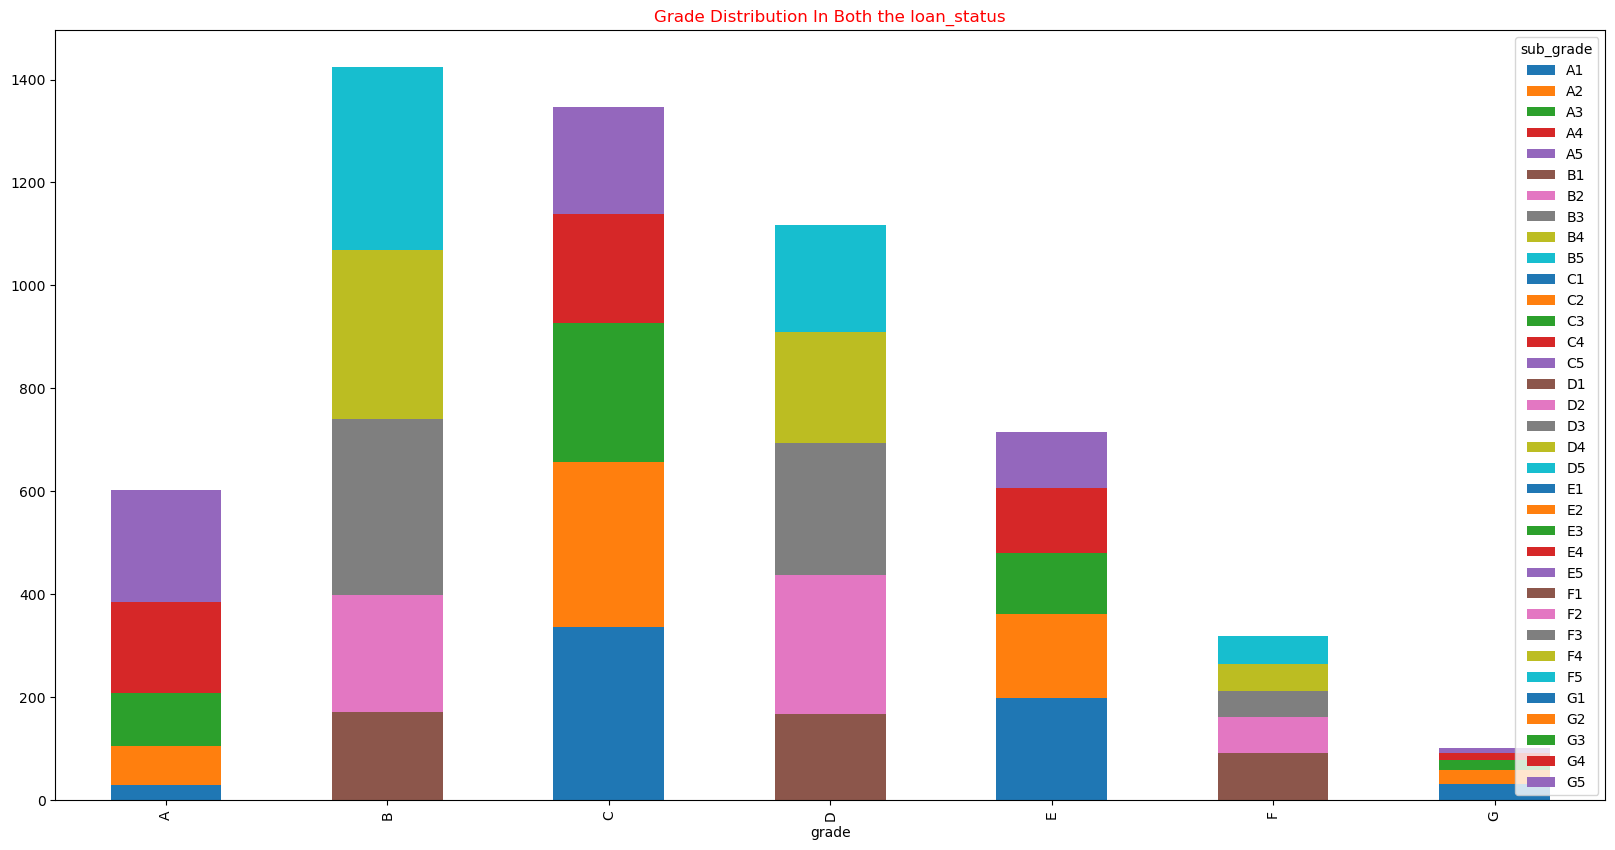

In [60]:
#Plotting loan grade-subgrade distribution for both the loan status categories

fp.groupby('grade')['sub_grade'].value_counts().unstack().plot(kind='bar',stacked=True,  figsize=(20, 10))
co.groupby('grade')['sub_grade'].value_counts().unstack().plot(kind='bar',stacked=True,  figsize=(20, 10))
plt.title("Grade Distribution In Both the loan_status", color = 'red')
plt.show()

#### Observation on home ownership and loan status
>> We see that in case of Fully Paid loan status, Grade A has more frequency. Whereas, In case of Charged-of, Grade A is significantly lesser. Hence, it can be observed that Higher Grades have very less chance of Defaulting or Charging off. 

## Impact of DTI(debt-to-income) ratio on loan_status 

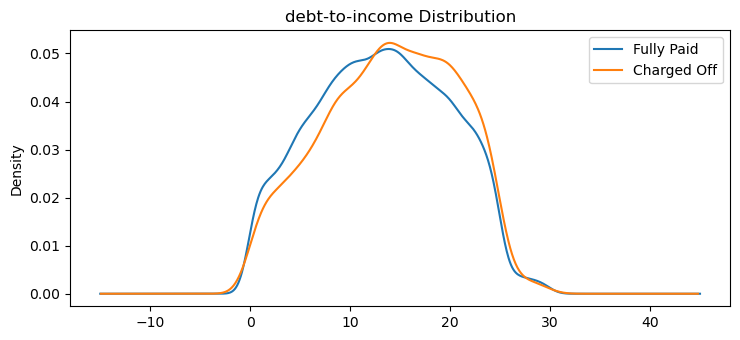

In [68]:

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe for DTI(debt-to-i) for Fully Paid and Charged Off 
data = pd.DataFrame({"Fully Paid":fp['dti'], "Charged Off": co['dti']})

# Plot the dataframe
ax = data[['Fully Paid', 'Charged Off']].plot(kind='kde', title='debt-to-income Distribution')

plt.show()

#### Observation on 'dti(debt-to-income)' ratio attribute
>> We observe that the applicants whose loan status is Charged Off i.e. Defaulters have slightly higher debt-to-income ratio. It makes sense as more the debt, the difficult it becomes to handle it.

## Impact of Loan Term on loan_status 

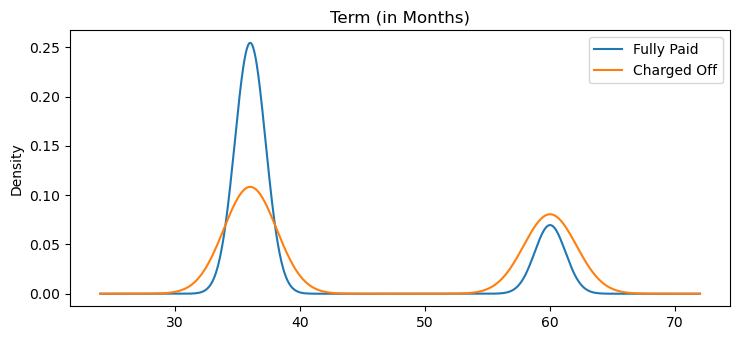

In [77]:
#Plotting the graph to show the Terms distribution in case of Fully Paid and Charged Off Applicants
data = pd.DataFrame({"Fully Paid":fp['term_in_month'], "Charged Off": co['term_in_month']})


ax = data[['Fully Paid', 'Charged Off']].plot(kind='density', title='Term (in Months)')
plt.show()

#### Observation on 'loan term' attribute
>> We observe that the applicants who have loan term as 36 months instead of 60 months. are more likely to Paid off the loan. 

## Impact of having fund_less_than_approved on loan_status 

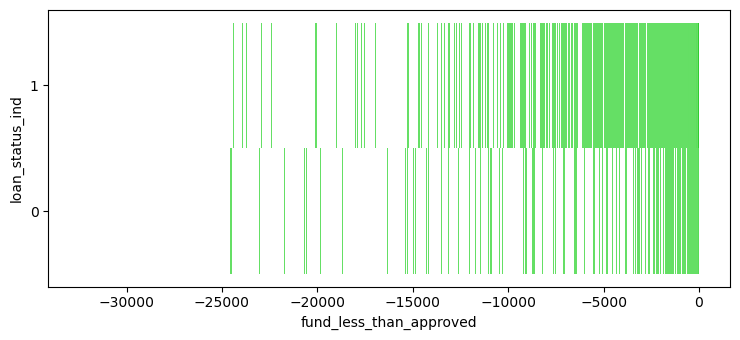

In [81]:
#Plotting the relation of loan_status and fund_less_than_approved 

sns.histplot(y='loan_status_ind', x='fund_less_than_approved', data=ld, color="green")
plt.show()

#### Observation on loan_status wrt fund_less_than_approved
>> We observe that the applicants whose investors have been careful while alocating the funds and have allocated the appropriate funds (upon analysis) instead of approved amount. Such applications have seen significantly lesser default rates.